# Import library

In [2]:
!pip install pythainlp # support Thai language (need to installin colab first)

     |████████████████████████████████| 11.0 MB 5.1 MB/s 
     |████████████████████████████████| 743 kB 41.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Import dataset

In [4]:
df_sentiment = pd.read_csv('/content/drive/Shareddrives/AI&IR_2021/Datasets/suicidal_labeled_all.csv') # read cvs in the path
df_sentiment

,preprocessed_content,labels
0,คือผมหมดไฟในการใช้ชีวิตในยุคนี้แล้วอะครับ คือผ...,suicidal
1,ถ้ารัฐบาลชุดนี้ยังอยู่ สักวันกูต้องกล้าพอที่จะ...,suicidal
2,เจอคำแปลเพลงเศร้าๆซึ้งๆก็ร้องไห้ ดูวีดิโอที่เห...,suicidal
3,เห็นการทำงานของหน่วยงานราชการ กับรัฐบาลชุดนี้แ...,suicidal
4,กูไปทำแล้วได้อะไรอะ เงินเดือนหรอ กูได้หรอวะ ถ้...,suicidal
...,...,...
213,ตอนนั้นคือร้องไห้หนักมาก ถึงความเป็นไปได้ที่น้...,non-suicidal
214,มีแต่ประชุมเครียดๆ ดีใจที่วันนี้ผ่านไปได้ เสาร...,non-suicidal
215,ดีใจที่ความพยายามไม่ทรยศพวกน้องว่ะ รักนะ,non-suicidal
216,หุว สุดยอดอ่า ยอดวันแรกได้ขนาดนี้เลยหรอเนี้ย ก...,non-suicidal


# Encode

In [5]:
encoding = {
    'non-suicidal': 0,
    'suicidal': 1,
}

y_sentiment_encoded = [encoding[sentiment] for sentiment in df_sentiment['labels'].values]
y_sentiment_encoded

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
X = df_sentiment['preprocessed_content'].values # text input
y = np.array(y_sentiment_encoded) # label output

print(X) 
print(y) 

['คือผมหมดไฟในการใช้ชีวิตในยุคนี้แล้วอะครับ คือผมไม่ไหวจริงๆผมอยากตายมากๆผมพยายามคิดบวกคิดในแง่ดีแต่ก็ไม่ได้ช่วยอะไร ผมหมดไฟและผมไม่มีเป้าหมายในชีวิตอีกต่อไป ผมอยากนอนและไม่ฟื้นอีกเลย #ฆ่าตัวตาย'
 'ถ้ารัฐบาลชุดนี้ยังอยู่ สักวันกูต้องกล้าพอที่จะฆ่าตัวเองตายใหได้'
 'เจอคำแปลเพลงเศร้าๆซึ้งๆก็ร้องไห้ ดูวีดิโอที่เหมือนโดนปลอบก็ร้องไห้ ้วคืนก่อนที่ไถติ๊กต็อกไปเรื่อยๆละไปหยุดดู 3 วิธีฆ่าตัวตายแบบไม่ทรมาน แล้วคลิปจบด้วยคำพุดว่า “ทำไมยังไม่เลื่อนผ่านไปล่ะ เหนื่อยมากเลยหรอ มีเรื่องอะไรรึป่าว” หลังจากนั้นกุก็ร้องไห้หนักมาก ร้องจนปวดตาแล้วก็หลับ'
 'เห็นการทำงานของหน่วยงานราชการ กับรัฐบาลชุดนี้แล้วกูอยากฆ่าตัวตายทุกวัน การมีชีวิตอยู่ในประเทศนี้แม่งหดหู่สัส ๆ แล้วคนที่หาเงินเดือนชนเดือนแบบกูก็มองไม่เห็นทางที่จะออกจากประเทศนี้ได้ด้วย ไอเหี้ย อยากตายจริงๆ'
 'กูไปทำแล้วได้อะไรอะ เงินเดือนหรอ กูได้หรอวะ ถ้าไม่ไปก็ต้องหาคนแทน กูโดนกดดันจนอยากตายอะ อยากฆ่าตัวตายเดี๋ยวนี้ตอนนี้ เขาเป็นเหี้ยอะไรกันไปหมด กูไม่ไหวแล้ว กูอดทนมาตลอด ทำไมวะ กูทำงานแล้วกูลาไม่ได้ แล้วมันก็ไม่ใช่หน้าที่ที่กูต้องไปทำแทนอาจารย์ทำไมอ

# Train test split

separate dataset:
- train dataset
- test dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# random_state=42 => คงการ random รูปแบบเดิม
# stratify=y => class ของแต่ละส่วoจำนวณไม่เท่ากัน

In [8]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 102, 0: 72})
Counter({1: 26, 0: 18})


# Thai word tokenizer

In [9]:
from pythainlp.tokenize import word_tokenize # lib ที่ช่วยตัดคำของภาษาไทย แล้วเอาคำมา score (tf-idf)

test = X_train[0]
print(word_tokenize(test))

['วันนี้', 'ทดสอบ', 'ความอดทน', 'กุ', 'มาก', 'กก', ' ', 'กุ', 'อยาก', 'ฆ่าตัวตาย', 'ให้', 'ตาย', 'ๆ', 'ไป', 'ซะ', ' ', 'อี', 'เหี้ย', ' ', 'ประสาท', 'จะ', 'กิน']


# Create TF-IDF Vector

In [10]:
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1)) # token จะใช้แตกต่างกันของแต่ละภาษา # K-gram ใน IR
text_train = tfidf.fit_transform(X_train) # คำนวณ tf idt
text_test = tfidf.transform(X_test)
text_train.shape, text_test.shape

((174, 1321), (44, 1321))

# Multinomial Naive Bayes

In [11]:
import time
from sklearn.naive_bayes import MultinomialNB

# Run classifier
nb_classifier = MultinomialNB()
t0 = time.time()
nb_classifier.fit(text_train, y_train)
print("Training time:", round(time.time()-t0, 3), "s")

t1 = time.time()
y_pred = nb_classifier.predict(text_test)
print("Predict time:", round(time.time()-t1, 3), "s")

Training time: 0.003 s
Predict time: 0.001 s


In [12]:
from sklearn.metrics import classification_report
print("---------------Multinomial Naive Bayes---------------")
print("")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

---------------Multinomial Naive Bayes---------------

              precision    recall  f1-score   support

           0      1.000     0.556     0.714        18
           1      0.765     1.000     0.867        26

    accuracy                          0.818        44
   macro avg      0.882     0.778     0.790        44
weighted avg      0.861     0.818     0.804        44



# Logistic Regression

In [13]:
import time
from sklearn.linear_model import LogisticRegression

# Run classifier
lr_classifier = LogisticRegression(solver="liblinear", random_state=42) # 
t0 = time.time()
lr_classifier.fit(text_train, y_train)
print("Training time:", round(time.time()-t0, 3), "s")

t1 = time.time()
y_pred = lr_classifier.predict(text_test)
print("Predict time:", round(time.time()-t1, 3), "s") 

Training time: 0.002 s
Predict time: 0.0 s


In [14]:
from sklearn.metrics import classification_report
print("-----------------Logistic Regression-----------------")
print("")
print(classification_report(y_test, y_pred, digits=3))

-----------------Logistic Regression-----------------

              precision    recall  f1-score   support

           0      1.000     0.833     0.909        18
           1      0.897     1.000     0.945        26

    accuracy                          0.932        44
   macro avg      0.948     0.917     0.927        44
weighted avg      0.939     0.932     0.931        44



# Support Vector Machine

In [20]:
import time
from sklearn import svm

# Run classifier
svm_classifier = svm.LinearSVC(random_state=42)
t0 = time.time()
svm_classifier.fit(text_train, y_train)
print("Training time:", round(time.time()-t0, 3), "s")

t1 = time.time()
y_score = svm_classifier.decision_function(text_test)
y_pred = svm_classifier.predict(text_test)
print("Predict time:", round(time.time()-t1, 3), "s")

Training time: 0.005 s
Predict time: 0.001 s


In [21]:
from sklearn.metrics import classification_report
print("----------------Support Vector Machine----------------")
print("")
print(classification_report(y_test, y_pred, digits=3))

----------------Support Vector Machine----------------

              precision    recall  f1-score   support

           0      1.000     0.944     0.971        18
           1      0.963     1.000     0.981        26

    accuracy                          0.977        44
   macro avg      0.981     0.972     0.976        44
weighted avg      0.978     0.977     0.977        44



In [17]:
import time
from sklearn.neighbors import KNeighborsClassifier

Kneigh_classifier = KNeighborsClassifier(n_neighbors=3)
t0 = time.time()
Kneigh_classifier.fit(text_train, y_train)
print("Training time:", round(time.time()-t0, 3), "s")

t1 = time.time()
y_pred = Kneigh_classifier.predict(text_test)
print("Predict time:", round(time.time()-t1, 3), "s")

Training time: 0.001 s
Predict time: 0.006 s


In [18]:
from sklearn.metrics import classification_report
print("-----------------K-Nearest Neighbors-----------------")
print("")
print(classification_report(y_test, y_pred, digits=3))

-----------------K-Nearest Neighbors-----------------

              precision    recall  f1-score   support

           0      0.923     0.667     0.774        18
           1      0.806     0.962     0.877        26

    accuracy                          0.841        44
   macro avg      0.865     0.814     0.826        44
weighted avg      0.854     0.841     0.835        44



# Confusion Matrix

[[17  1]
 [ 0 26]]


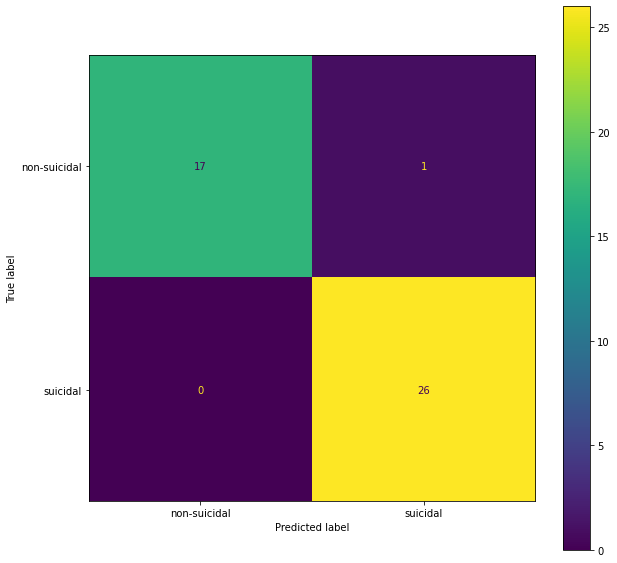

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['non-suicidal', 'suicidal']
fig, ax = plt.subplots(figsize=(10, 10))

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(svm_classifier, text_test, y_test, display_labels=labels, ax=ax, values_format='d') 
plt.show()  

# All misclassified texts

In [23]:
import numpy as np

misclassified = np.where(y_test != y_pred) # check in array that missclassified
inv_encoding = {v: k for k, v in encoding.items()}

df_misclassify = pd.DataFrame(X_test[misclassified], columns=['misclassied_content'])
df_misclassify['actual'] = [inv_encoding[sentiment] for sentiment in y_test[misclassified]]
df_misclassify['predict'] = [inv_encoding[sentiment] for sentiment in y_pred[misclassified]]
df_misclassify

,misclassied_content,actual,predict
0,กูก็จะดีใจกว่า (มุก555เห็นชงมา)ิงคือ กูก็จะหัว...,non-suicidal,suicidal


In [24]:
df_misclassify[(df_misclassify['actual'] == 'suicidal') & (df_misclassify['predict'] == 'non-suicidal')]


,misclassied_content,actual,predict


In [25]:
df_misclassify[(df_misclassify['actual'] == 'non-suicidal') & (df_misclassify['predict'] == 'suicidal')]

,misclassied_content,actual,predict
0,กูก็จะดีใจกว่า (มุก555เห็นชงมา)ิงคือ กูก็จะหัว...,non-suicidal,suicidal


# Cross-validation (Optional)

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True) # equally class

# make pipeline
tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
model = svm.LinearSVC(random_state=42)

clf = make_pipeline(tfidf, model)

# evaluate model # f1-score 
f1_macro_scores = cross_val_score(clf, X, y, scoring='f1_macro', cv=cv, n_jobs=-1) 
f1_weighted_scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

print(f1_macro_scores)
print(f1_weighted_scores)

[1.         1.         0.95206972 0.95206972 1.         1.
 0.95206972 0.95368421 1.         1.        ]
[1.         1.         0.95405031 0.95405031 1.         1.
 0.95405031 0.95483254 1.         1.        ]


In [29]:
cv_train_index = []
cv_test_index = []

# enumerate splits
for train, test in cv.split(X, y):
  cv_train_index.append(train)
  cv_test_index.append(test)

In [30]:
X_train_new = X[cv_train_index[0]]
X_test_new = X[cv_test_index[0]]
y_train_new = y[cv_train_index[0]]
y_test_new = y[cv_test_index[0]]

print(X_train_new)
print(y_train_new)

['คือผมหมดไฟในการใช้ชีวิตในยุคนี้แล้วอะครับ คือผมไม่ไหวจริงๆผมอยากตายมากๆผมพยายามคิดบวกคิดในแง่ดีแต่ก็ไม่ได้ช่วยอะไร ผมหมดไฟและผมไม่มีเป้าหมายในชีวิตอีกต่อไป ผมอยากนอนและไม่ฟื้นอีกเลย #ฆ่าตัวตาย'
 'ถ้ารัฐบาลชุดนี้ยังอยู่ สักวันกูต้องกล้าพอที่จะฆ่าตัวเองตายใหได้'
 'เจอคำแปลเพลงเศร้าๆซึ้งๆก็ร้องไห้ ดูวีดิโอที่เหมือนโดนปลอบก็ร้องไห้ ้วคืนก่อนที่ไถติ๊กต็อกไปเรื่อยๆละไปหยุดดู 3 วิธีฆ่าตัวตายแบบไม่ทรมาน แล้วคลิปจบด้วยคำพุดว่า “ทำไมยังไม่เลื่อนผ่านไปล่ะ เหนื่อยมากเลยหรอ มีเรื่องอะไรรึป่าว” หลังจากนั้นกุก็ร้องไห้หนักมาก ร้องจนปวดตาแล้วก็หลับ'
 'เห็นการทำงานของหน่วยงานราชการ กับรัฐบาลชุดนี้แล้วกูอยากฆ่าตัวตายทุกวัน การมีชีวิตอยู่ในประเทศนี้แม่งหดหู่สัส ๆ แล้วคนที่หาเงินเดือนชนเดือนแบบกูก็มองไม่เห็นทางที่จะออกจากประเทศนี้ได้ด้วย ไอเหี้ย อยากตายจริงๆ'
 'กูไปทำแล้วได้อะไรอะ เงินเดือนหรอ กูได้หรอวะ ถ้าไม่ไปก็ต้องหาคนแทน กูโดนกดดันจนอยากตายอะ อยากฆ่าตัวตายเดี๋ยวนี้ตอนนี้ เขาเป็นเหี้ยอะไรกันไปหมด กูไม่ไหวแล้ว กูอดทนมาตลอด ทำไมวะ กูทำงานแล้วกูลาไม่ได้ แล้วมันก็ไม่ใช่หน้าที่ที่กูต้องไปทำแทนอาจารย์ทำไมอ

In [31]:
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1)) # token จะใช้แตกต่างกันของแต่ละภาษา # K-gram ใน IR
text_train = tfidf.fit_transform(X_train_new) # คำนวณ tf idt
text_test = tfidf.transform(X_test_new)
text_train.shape, text_test.shape

((196, 1402), (22, 1402))

## Train Model with Support Vector Machine

In [32]:
import time
from sklearn import svm

# Run classifier
svm_classifier = svm.LinearSVC(random_state=42)
t0 = time.time()
svm_classifier.fit(text_train, y_train_new)
print("Training time:", round(time.time()-t0, 3), "s")

t1 = time.time()
y_score = svm_classifier.decision_function(text_test)
y_pred = svm_classifier.predict(text_test)
print("Predict time:", round(time.time()-t1, 3), "s")

Training time: 0.002 s
Predict time: 0.001 s


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000        13

    accuracy                          1.000        22
   macro avg      1.000     1.000     1.000        22
weighted avg      1.000     1.000     1.000        22



# Confusion Matrix

[[ 9  0]
 [ 0 13]]


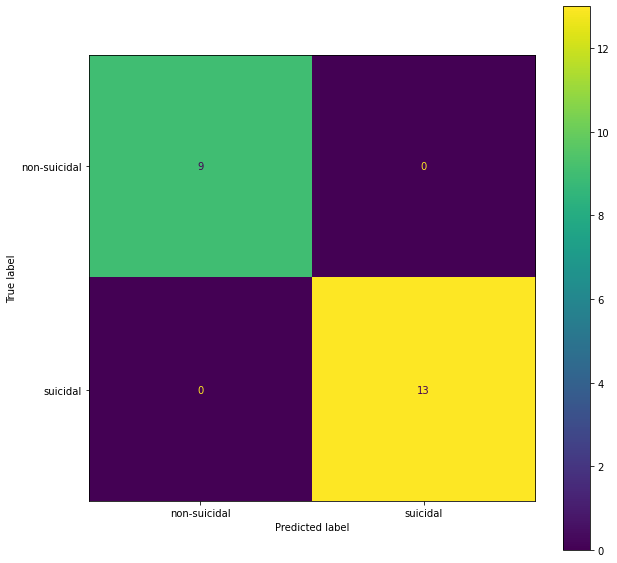

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['non-suicidal', 'suicidal']
fig, ax = plt.subplots(figsize=(10, 10))

print(confusion_matrix(y_true=y_test_new, y_pred=y_pred))
plot_confusion_matrix(svm_classifier, text_test, y_test_new, display_labels=labels, ax=ax, values_format='d')  
plt.show() 